In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from collections import OrderedDict

import numpy as np
import time
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import helper

In [2]:
x = torch.randn(2, 2, requires_grad=True)
print(x)

tensor([[-1.3055,  1.0103],
        [ 0.6196, -0.3931]], requires_grad=True)


In [3]:
y = x**2
print(y)

tensor([[1.7044, 1.0206],
        [0.3838, 0.1545]], grad_fn=<PowBackward0>)


In [4]:
print(y.grad_fn)

In [5]:
z = y.mean()
print(z)

tensor(0.8158, grad_fn=<MeanBackward0>)


In [6]:
x.grad

In [7]:
z.backward()
print(x.grad)
print(x/2)

tensor([[-0.6528,  0.5051],
        [ 0.3098, -0.1965]])
tensor([[-0.6528,  0.5051],
        [ 0.3098, -0.1965]], grad_fn=<DivBackward0>)


# Get data and define the network

In [9]:
from torchvision import datasets, transforms

# Define a transform to normalize
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                               ])
# Download and load the training
trainset = datasets.MNIST("MNIST_data/", download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [12]:
# Hyperparams to the network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Feed forward
model = nn.Sequential(OrderedDict([
                     ("fc1", nn.Linear(input_size, hidden_sizes[0])),
                     ("relu1", nn.ReLU()),
                     ("fc2", nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                     ("relu2", nn.ReLU()),
                     ("logits", nn.Linear(hidden_sizes[1], output_size))]))

## Training

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [16]:
print("Before {}".format(model.fc1.weight))

images, labels = next(iter(trainloader))
images.resize_(64, 784)

optimizer.zero_grad()

# Forward pass
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print("Gradient {}" .format(model.fc1.weight.grad))
optimizer.step()

Before Parameter containing:
tensor([[-0.0200, -0.0067, -0.0304,  ...,  0.0248, -0.0094,  0.0089],
        [ 0.0280, -0.0265, -0.0318,  ..., -0.0070, -0.0342, -0.0346],
        [-0.0047, -0.0042, -0.0243,  ..., -0.0033,  0.0044, -0.0213],
        ...,
        [-0.0145,  0.0283, -0.0079,  ...,  0.0252,  0.0321,  0.0303],
        [-0.0210, -0.0311, -0.0028,  ..., -0.0071, -0.0315,  0.0317],
        [ 0.0313,  0.0021, -0.0348,  ..., -0.0094,  0.0269, -0.0264]],
       requires_grad=True)
Gradient tensor([[ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        ...,
        [-0.0013, -0.0013, -0.0013,  ..., -0.0013, -0.0013, -0.0013],
        [-0.0016, -0.0016, -0.0016,  ..., -0.0016, -0.0016, -0.0016],
        [ 0.0068,  0.0068,  0.0068,  ...,  0.0068,  0.0068,  0.0068]])


In [18]:
print("Updated weights {}" .format(model.fc1.weight))

Updated weights Parameter containing:
tensor([[-0.0200, -0.0067, -0.0304,  ...,  0.0248, -0.0094,  0.0089],
        [ 0.0281, -0.0265, -0.0318,  ..., -0.0070, -0.0342, -0.0346],
        [-0.0047, -0.0042, -0.0243,  ..., -0.0033,  0.0044, -0.0213],
        ...,
        [-0.0145,  0.0283, -0.0079,  ...,  0.0252,  0.0322,  0.0303],
        [-0.0210, -0.0311, -0.0028,  ..., -0.0071, -0.0314,  0.0317],
        [ 0.0313,  0.0020, -0.0349,  ..., -0.0094,  0.0268, -0.0265]],
       requires_grad=True)


# Training epochs

In [19]:
epochs = 3
print_every = 40
steps = 0
for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        steps += 1
        images.resize_(images.shape[0], 784)
        
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print("""
            Epoch: {}/{}... Loss: {:.4f}
            """ .format(epoch+1, epochs, running_loss/print_every))
            running_loss = 0


            Epoch: 1/3...

            Loss: 2.2791
            

            Epoch: 1/3...

            Loss: 2.1930
            

            Epoch: 1/3...

            Loss: 2.0855
            

            Epoch: 1/3...

            Loss: 1.9549
            

            Epoch: 1/3...

            Loss: 1.7593
            

            Epoch: 1/3...

            Loss: 1.5509
            

            Epoch: 1/3...

            Loss: 1.3222
            

            Epoch: 1/3...

            Loss: 1.1194
            

            Epoch: 1/3...

            Loss: 0.9703
            

            Epoch: 1/3...

            Loss: 0.8703
            

            Epoch: 1/3...

            Loss: 0.7604
            

            Epoch: 1/3...

            Loss: 0.6948
            

            Epoch: 1/3...

            Loss: 0.6563
            

            Epoch: 1/3...

            Loss: 0.6138
            

            Epoch: 1/3...

            Loss: 0.5733
            

         

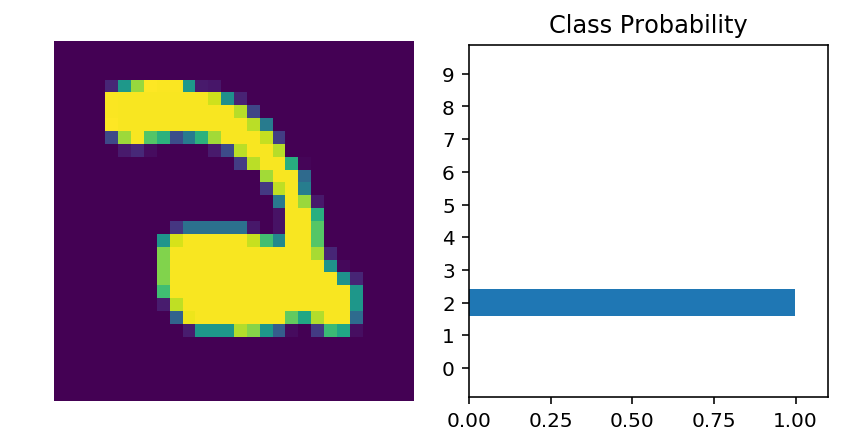

In [26]:
from random import randint
images, labels = next(iter(trainloader))
index = randint(1, images.shape[0])
img = images[index].view(1, 784)

# Turn off gradients to speed up
with torch.no_grad():
    logits = model.forward(img)

# Output the classification
ps = F.softmax(logits, dim=1)
helper.view_classify(img.view(1, 28, 28), ps)